## Inteligência Computacional 

* Amanda Oliveira
* Ana Maria Brito
* Leonardo Costa Resende 

**Tarefa: Utilizando o Método do gradiente mostrados nos slides e vídeos do tópico 3, aproximar a saída 
para f(x) = x²**

## Bibliotecas e parâmetros

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# learning_rate, number of iterations, number of inputs
alpha = 0.01
gen = 1000
num_x_points = 1000

## Visualização das Gaussianas iniciais

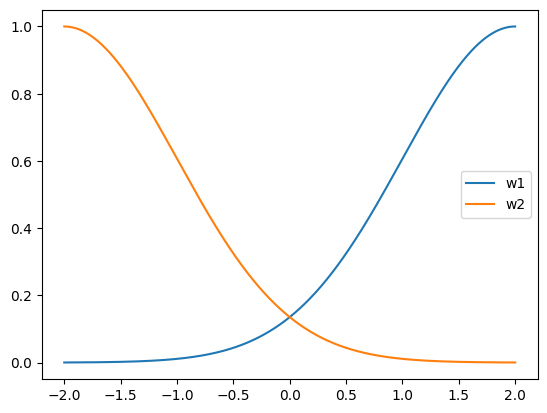

In [30]:
x_range = np.linspace(-2,2,num_x_points)

mf1 = np.exp(-0.5*(x_range-2/1)**2)
mf2 = np.exp(-0.5*(x_range+2/1)**2)

fig, ax = plt.subplots()
plt.plot(x_range, mf1, label='w1')
plt.plot(x_range, mf2, label='w2')
ax.legend()

## Inicialização das variáveis

In [31]:
desvio1 = 1
desvio2 = 1
media1 = -2
media2 = 2

p1 = np.random.sample()
p2 = np.random.sample()
q1 = np.random.sample()
q2 = np.random.sample()

## Derivada em relação ao erro

In [32]:
x_plot, y_plot = [], []
points = np.linspace(-2,2,100)
x_plot.append(points)
for _ in range(gen):
    # Embaralhamos os pontos de entrada
    np.random.shuffle(x_range)
    for x in x_range:
        y1 = p1*x + q1
        y2 = p2*x + q2
        w1 = np.exp(-0.5*(x-media1/desvio1)**2)
        w2 = np.exp(-0.5*(x-media2/desvio2)**2)

        y = (w1*y1 + w2*y2)/(w1+w2)

        # Calculamos a próxima iteração de variáveis (antiga menos alfa vezes gradiente)
        desvio1 = desvio1 - alpha * (y-(x**2)) * w2 * ((y1 - y2) / (w1+w2)**2) * w1 * ((x-media1)**2 / desvio1**3)
        desvio2 = desvio2 - alpha * (y-(x**2)) * w1 * ((y2 - y1) / (w1+w2)**2) * w2 * ((x-media2)**2 / desvio2**3)

        media1 = media1 - alpha * (y-(x**2)) * w2 * ((y1-y2)/(w1+w2)**2) * w1 * ((x-media1)/desvio1**2)
        media2 = media2 - alpha * (y-(x**2)) * w1 * ((y2-y1)/(w1+w2)**2) * w2 * ((x-media2)/desvio2**2)

        p1 = p1 - alpha * (y-(x**2)) * x * w1 / (w1+w2)
        p2 = p2 - alpha * (y-(x**2)) * x * w2 / (w1+w2)

        q1 = q1 - alpha * (y-(x**2)) * w1 / (w1+w2)
        q2 = q2 - alpha * (y-(x**2)) * w2 / (w1+w2)

    # Armazenamos dados para calcular erro e plottar
    y1 = p1*points + q1
    y2 = p2*points + q2
    w1 = np.exp(-0.5*(points-media1/desvio1)**2)
    w2 = np.exp(-0.5*(points-media2/desvio2)**2)
    predict = (w1*y1 + w2*y2)/(w1+w2)
    y_plot.append(predict)
    ##print(f'Gen: {_}, Error: {0.5*(y-x**2)**2}')

Gen: 999, Error: 9.305159743393273e-05


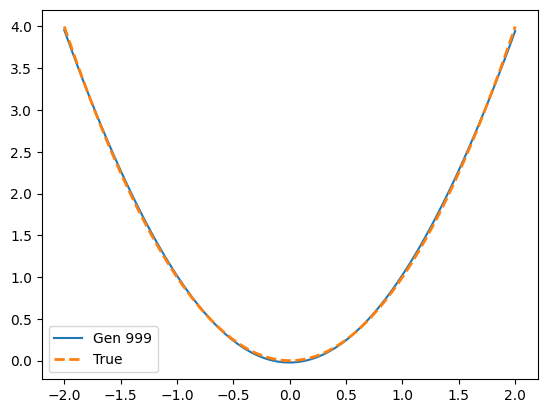

In [33]:
print(f'Gen: {gen-1}, Error: {0.5*(y-x**2)**2}')
plt.plot(x_plot[0], y_plot[gen-1], label=f'Gen {gen-1}')


plt.plot(x_plot[0], x_plot[0]**2, label='True', linestyle='--', linewidth=2)
plt.legend()
plt.show()

In [34]:
# Mostra mais do início onde o gradiente é maior
np.logspace(0, np.log10(100), num=10, endpoint=True).astype(int)

array([  1,   1,   2,   4,   7,  12,  21,  35,  59, 100])